In [ ]:
#SafeCar - TDSVJ
#RM 95694 - Gabriel Mira Soares Santos
#RM 93423 - Jhonatas Oliveira

In [149]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.linear_model import ElasticNet
from matplotlib import colors
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from random import sample
from sklearn import svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN

#Pré-processamento

In [150]:
link = "/content/sensor_readings_24.csv" #exibindo os dados
df = pd.read_csv(link)
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


In [151]:
#Copiando o dataframe original a fim de poder também obter outros resultados com os mesmos dados
dados = df.copy()

In [152]:
df.info() #visualizando os dados, tipos e se possui algum dado faltante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

In [153]:
df.describe() #obtendo algumas informações possivelmente serão normalizadas pela analise

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
count,5442.00000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,...,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,1.47179,2.326341,2.489948,2.797322,2.957098,2.892281,3.353062,2.541642,3.124444,2.831949,...,2.207144,1.201435,0.990570,0.910477,1.058291,1.075040,1.016266,1.778128,1.554798,1.577263
std,0.80340,1.410248,1.248046,1.309191,1.338176,1.281874,1.413295,1.111502,1.356426,1.306933,...,1.716399,1.097361,0.943122,0.890029,1.144670,1.139257,0.888216,1.572291,1.291143,1.149573
min,0.40000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.92100,1.362000,1.539250,1.731250,1.774000,1.785250,1.931000,1.618250,1.799250,1.636000,...,0.860000,0.691000,0.581000,0.530000,0.523250,0.541000,0.567000,0.742250,0.792000,0.884000
50%,1.33400,1.900500,2.064000,2.460500,2.666500,2.682500,3.226000,2.174000,2.802000,2.679000,...,1.329000,0.803000,0.738000,0.685000,0.691000,0.693000,0.763500,1.030000,1.071000,1.289000
75%,1.81400,2.684500,2.740750,4.094500,4.313000,3.830500,5.000000,3.193000,5.000000,3.523500,...,4.447000,1.158750,0.913000,0.837000,0.857000,0.862750,1.002750,2.067750,1.560500,1.657000
max,5.00000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [155]:
df.drop_duplicates(keep='first', inplace=True) #removendo duplicados por desencargo de consciencia




In [157]:
#Dropando dados faltantes da coluna funcao robo
df.funcao_robo.value_counts(dropna=True)
df.dropna()


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


#Análise Explorátoria

In [218]:
df.columns

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21',
       'sensor_22', 'sensor_23', 'sensor_24', 'funcao_robo', 'clus'],
      dtype='object')

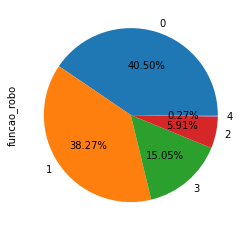

In [214]:
#Analisando a distribuição das direções, pode ser visualizado que move-forward foi a mais utilizada
df['funcao_robo'].value_counts().plot.pie(autopct = '%0.2f%%')

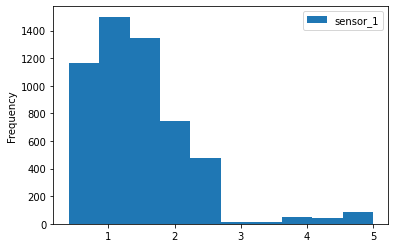

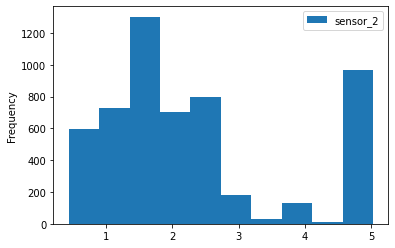

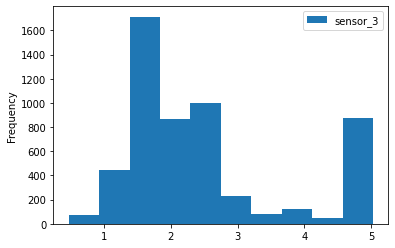

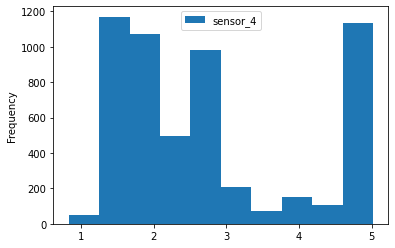

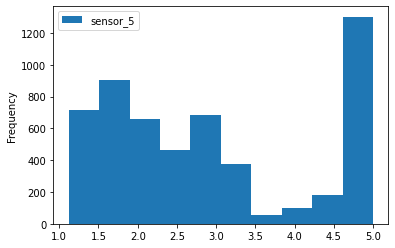

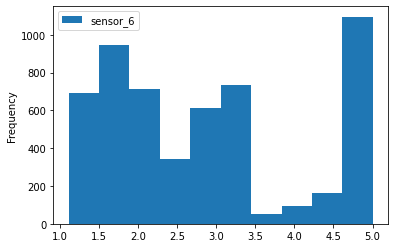

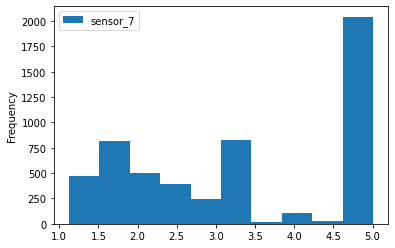

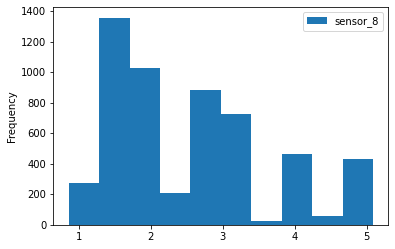

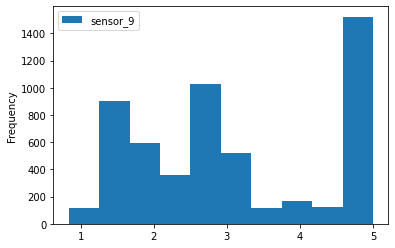

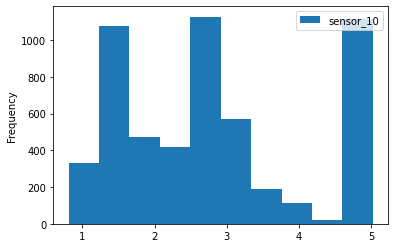

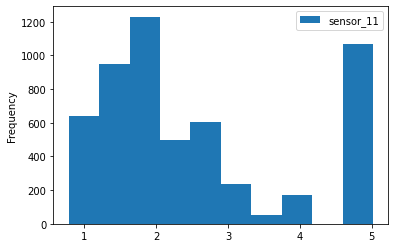

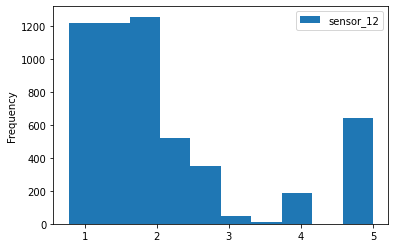

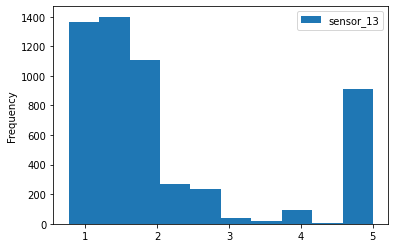

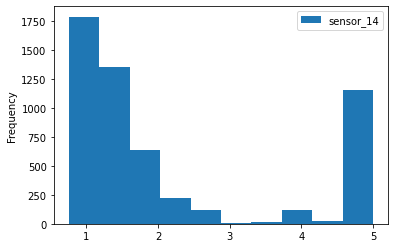

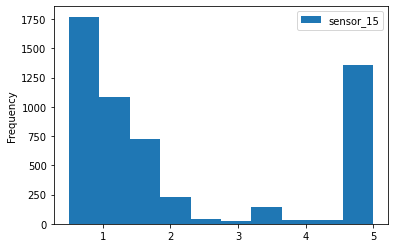

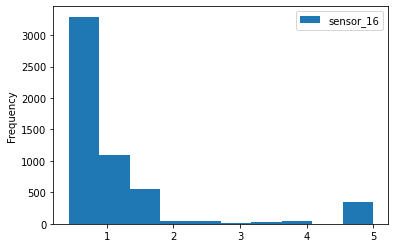

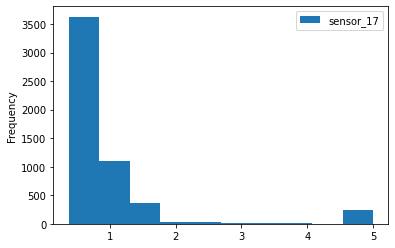

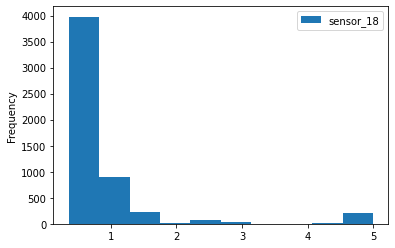

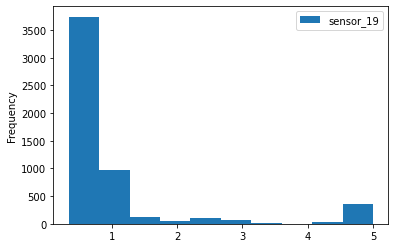

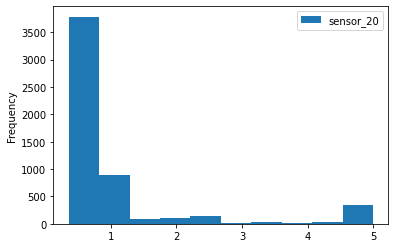

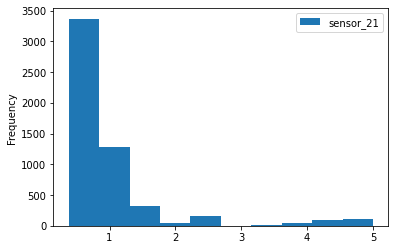

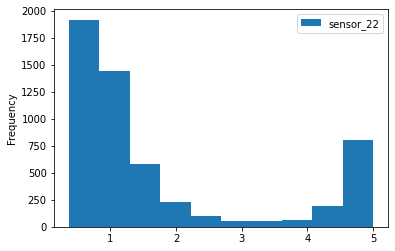

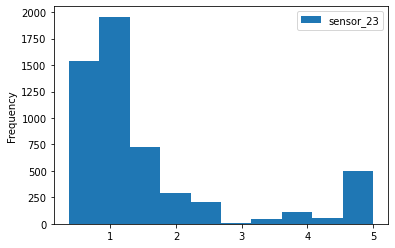

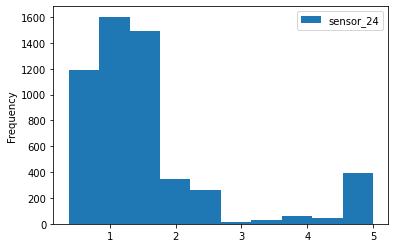

In [160]:
#Analisando e comparando resultados de cada sensor (aqui temos 24 gráficos sendo 1 para cada sensor)
for coluna in df.columns:
    try:
        df[coluna].plot.hist(legend=True)
        plt.show()
    except:
        pass

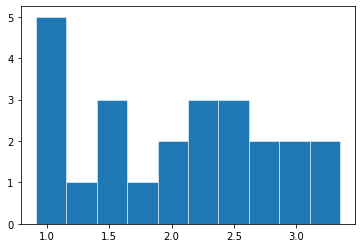

In [213]:
#Analisando a media de cada sensor com base nos dados fornecidos
medias = []

for coluna in dados.columns:
  media = dados[coluna].mean()
  medias.append(media)

x = medias

fig, ax = plt.subplots()

ax.hist(x, bins=10, linewidth=0.5, edgecolor="white")

plt.show()

não encontramos outliers, por isso não tratamos, o que é uma boa coisa

Lembrando que também existe mais outros gráficos ao decorrer do código

#Feature Engineering

In [162]:
#Label encoding
le = preprocessing.LabelEncoder()

df["funcao_robo"] = le.fit_transform( df["funcao_robo"] )

In [163]:
def clean_dataset(df): #Funcao de limpeza profunda de dados NaN identificados acima, foi feita a limpeza após a transformação para dummies
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,3.0
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,3.0
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,3.0
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,3.0
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,0.0
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,1.0
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,1.0
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,0.0


In [164]:
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,3
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,3
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,3
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,3
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,0
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,1
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,1
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,0


In [165]:
#copiando um data frame sem os dados normalizados
df_c = df.copy()

In [166]:
sc = StandardScaler() #Criando uma padronização e uma normalização de dados
sc.fit_transform(df)

mm = MinMaxScaler(feature_range=(10, 20))
mm.fit_transform(df)

array([[10.0826087 , 10.13295554, 16.92037728, ..., 10.15756529,
        10.11248107, 17.5       ],
       [10.0826087 , 10.13295554, 16.92037728, ..., 10.16404058,
        10.11248107, 17.5       ],
       [10.0826087 , 10.13295554, 16.92037728, ..., 10.17051586,
        10.11248107, 17.5       ],
       ...,
       [11.1673913 , 19.94551003, 17.81750384, ..., 20.        ,
        11.57473502, 12.5       ],
       [11.18478261, 17.87925022, 17.85698618, ..., 20.        ,
        11.60285529, 10.        ],
       [11.19565217, 17.9097646 , 19.93638956, ..., 20.        ,
        11.71101017, 12.5       ]])

In [167]:
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,3
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,3
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,3
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,3
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,0
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,1
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,1
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,0


#Clusterização

In [168]:
X = df.div(df.sum(axis=1),axis='rows') #transformando a soma de cada linha para 1, CRIANDO UMA DISTANCIA COSSENO
X

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.009893,0.011248,0.081875,0.082326,0.112931,0.065906,0.112931,0.053100,0.052671,0.059695,...,0.013394,0.011338,0.011135,0.011383,0.010051,0.009735,0.010028,0.009938,0.009689,0.067758
1,0.009827,0.011173,0.081327,0.081843,0.112176,0.065466,0.112176,0.059161,0.052319,0.059431,...,0.013282,0.011262,0.011061,0.011307,0.010073,0.009670,0.009961,0.009939,0.009625,0.067305
2,0.009831,0.011178,0.081366,0.081455,0.112228,0.065496,0.112228,0.059189,0.052388,0.059324,...,0.013310,0.011268,0.011066,0.011313,0.010078,0.009674,0.009966,0.010011,0.009629,0.067337
3,0.009865,0.011310,0.081832,0.081855,0.112872,0.065872,0.112872,0.053118,0.052689,0.059642,...,0.013387,0.011332,0.011129,0.011377,0.010136,0.009730,0.010023,0.010023,0.009684,0.067723
4,0.009833,0.011179,0.081399,0.081466,0.112244,0.065505,0.112244,0.059265,0.052395,0.059242,...,0.013290,0.011269,0.011067,0.011314,0.010079,0.009675,0.009967,0.009900,0.009630,0.067346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.016766,0.092123,0.073643,0.051313,0.051036,0.047388,0.044827,0.020028,0.032649,0.019162,...,0.012160,0.011939,0.012105,0.012639,0.092123,0.019254,0.092123,0.092123,0.028779,0.000000
5452,0.019505,0.105321,0.084573,0.058811,0.058495,0.054156,0.037241,0.022560,0.037115,0.021507,...,0.013734,0.013481,0.013671,0.033555,0.034040,0.022286,0.105321,0.105321,0.022855,0.021064
5453,0.018851,0.100594,0.081159,0.056312,0.056010,0.051725,0.035288,0.021185,0.035248,0.020159,...,0.013037,0.012735,0.012916,0.014908,0.100594,0.021426,0.100594,0.100594,0.022231,0.020119
5454,0.018284,0.078398,0.078398,0.054348,0.054000,0.047228,0.033994,0.020006,0.033724,0.019019,...,0.012402,0.012112,0.012286,0.014588,0.096740,0.020818,0.096740,0.096740,0.021631,0.000000


In [169]:
km = KMeans(n_clusters=8) #predict de 8 clusters em media, porém terá que ser validado e confirmado!!
km.fit_predict(X)

distortions = [] #Criando distorção para inserir em um gráfico de cotovelo
n_clusters = range(2, 15)
for n_clus in n_clusters:
  print(n_clus) #printando os clusters
  distortions.append(KMeans(n_clusters=n_clus,max_iter=10_000, n_init=100, random_state=61658).fit(X).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


In [170]:
distortions

[67.01940429340947,
 60.42171490939137,
 54.739663566043426,
 51.25036431992413,
 48.4370187008055,
 46.63304415591726,
 44.89537608780772,
 43.28551380276487,
 42.00858321356861,
 40.79746385036234,
 39.792237540557124,
 38.86080054588754,
 37.9293599103446]

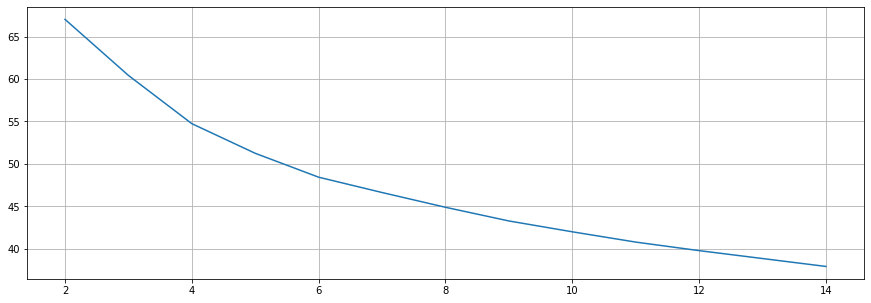

In [171]:
plt.figure(figsize=(15,5)) #Percebe-se o cotovelo do gráfico, pela analise feita entre 3 à 4, ou seja, 4 clusters.
plt.plot(n_clusters, distortions)
plt.grid()

In [172]:
km = KMeans(n_clusters= 5,max_iter=10_000, n_init=100, random_state=61658) #criando os predicts com os dados transformados, passando o nº de clusters analisado na tabela
db = DBSCAN(eps=0.5) 
c_km = km.fit_predict(X)
c_db = db.fit_predict(X)

x_transformado = km.fit_predict(X)

In [173]:
df.loc[:, 'clus'] = x_transformado #FOI CRIADO OS CLUSTERS, ENCONTRANDO AGRUPAMENTOS ENTRE SENSORES
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo,clus
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,3,3
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,3,3
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,3,3
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,3,3
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,0,0
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,1,2
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,1,2
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,0,0


### Verificamos que o agrupamento ficaram bem proximos dos diferentes tipos de movimentos, isso significa que tivemos um bom resultado

#Modelo Classificação KNN - SEM NORMALIZAÇÃO

> Bloco com recuo



In [174]:
 # Separando dados de labels
X = df_c.drop('funcao_robo', axis = 1)
y = df_c["funcao_robo"]

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [206]:
#Visualizando dados
print("N dados = ", len(df))
print("X_train = ", len(X_train))
print("X_test = ", len(X_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

N dados =  5129
X_train =  3590
X_test =  1539
y_train =  3590
y_test =  1539


In [219]:
#Analisando o modelo, visualiza-se que ele tem uma métrica de acerto de 84%
k = 4
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)

print(f'Acurácia: {acc:.4f}')

Acurácia: 0.8454


In [177]:
#criando a função para podermos manipular de forma mais dinamica
def meu_knn(X_tr, X_ts, y_tr, y_ts, k=0):
  if k == 0:
    k = int((len(y_tr) + len(y_ts)) ** 0.5)

  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_tr, y_tr)

  y_pred = knn.predict(X_ts)

  acc = metrics.accuracy_score(y_ts, y_pred)

  print(f'k: {k},\tAcurácia: {acc:.4f}')
#Podemos visualizar também que essa é uma boa forma de achar o K, pois fizemos a raiz da soma do y_train com o y_test

In [224]:
#É possível verificar que com o valor de k em 3, obtivemos um melhor resultado
meu_knn(X_train, X_test, y_train, y_test, 3)

k: 3,	Acurácia: 0.8642


# Modelo de classificação - NORMALIZADO

In [211]:
#Separando dados e labels
X = df_c.drop('funcao_robo', axis = 1)
y = df_c["funcao_robo"]

# Treino e teste normalizados
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)


In [212]:
 #Consultando a função novamente, percebe-se que achamos um número de K, mas que a acurácia foi mediana
 meu_knn(X_train_norm, X_test_norm, y_train, y_test)

k: 71,	Acurácia: 0.7472


#Arvore de decisão, arvore aleatória e machine learning (2)

In [225]:
#IMPORTANDO
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [226]:
 # Separando dados de labels
X = df.drop(columns=["funcao_robo"])
y = df["funcao_robo"]

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [227]:
display(X.shape)
display(X_train.shape)
display(X_test.shape)

(5129, 25)

(3590, 25)

(1539, 25)

In [228]:
#Criando o modelo de machine learning

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [229]:
#Avaliando a taxa de acerto, podemos ver que é uma taxa muito boa
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.4f}')

Acurácia: 0.9831


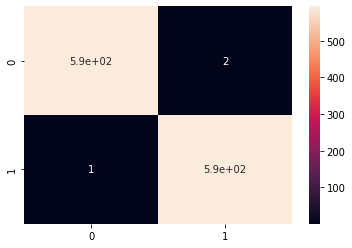

In [230]:
#Matriz de confusão
matriz = confusion_matrix(y_true = y_test,
                          y_pred = y_pred,
                          labels = [0, 1])

sns.heatmap(matriz, annot=True)

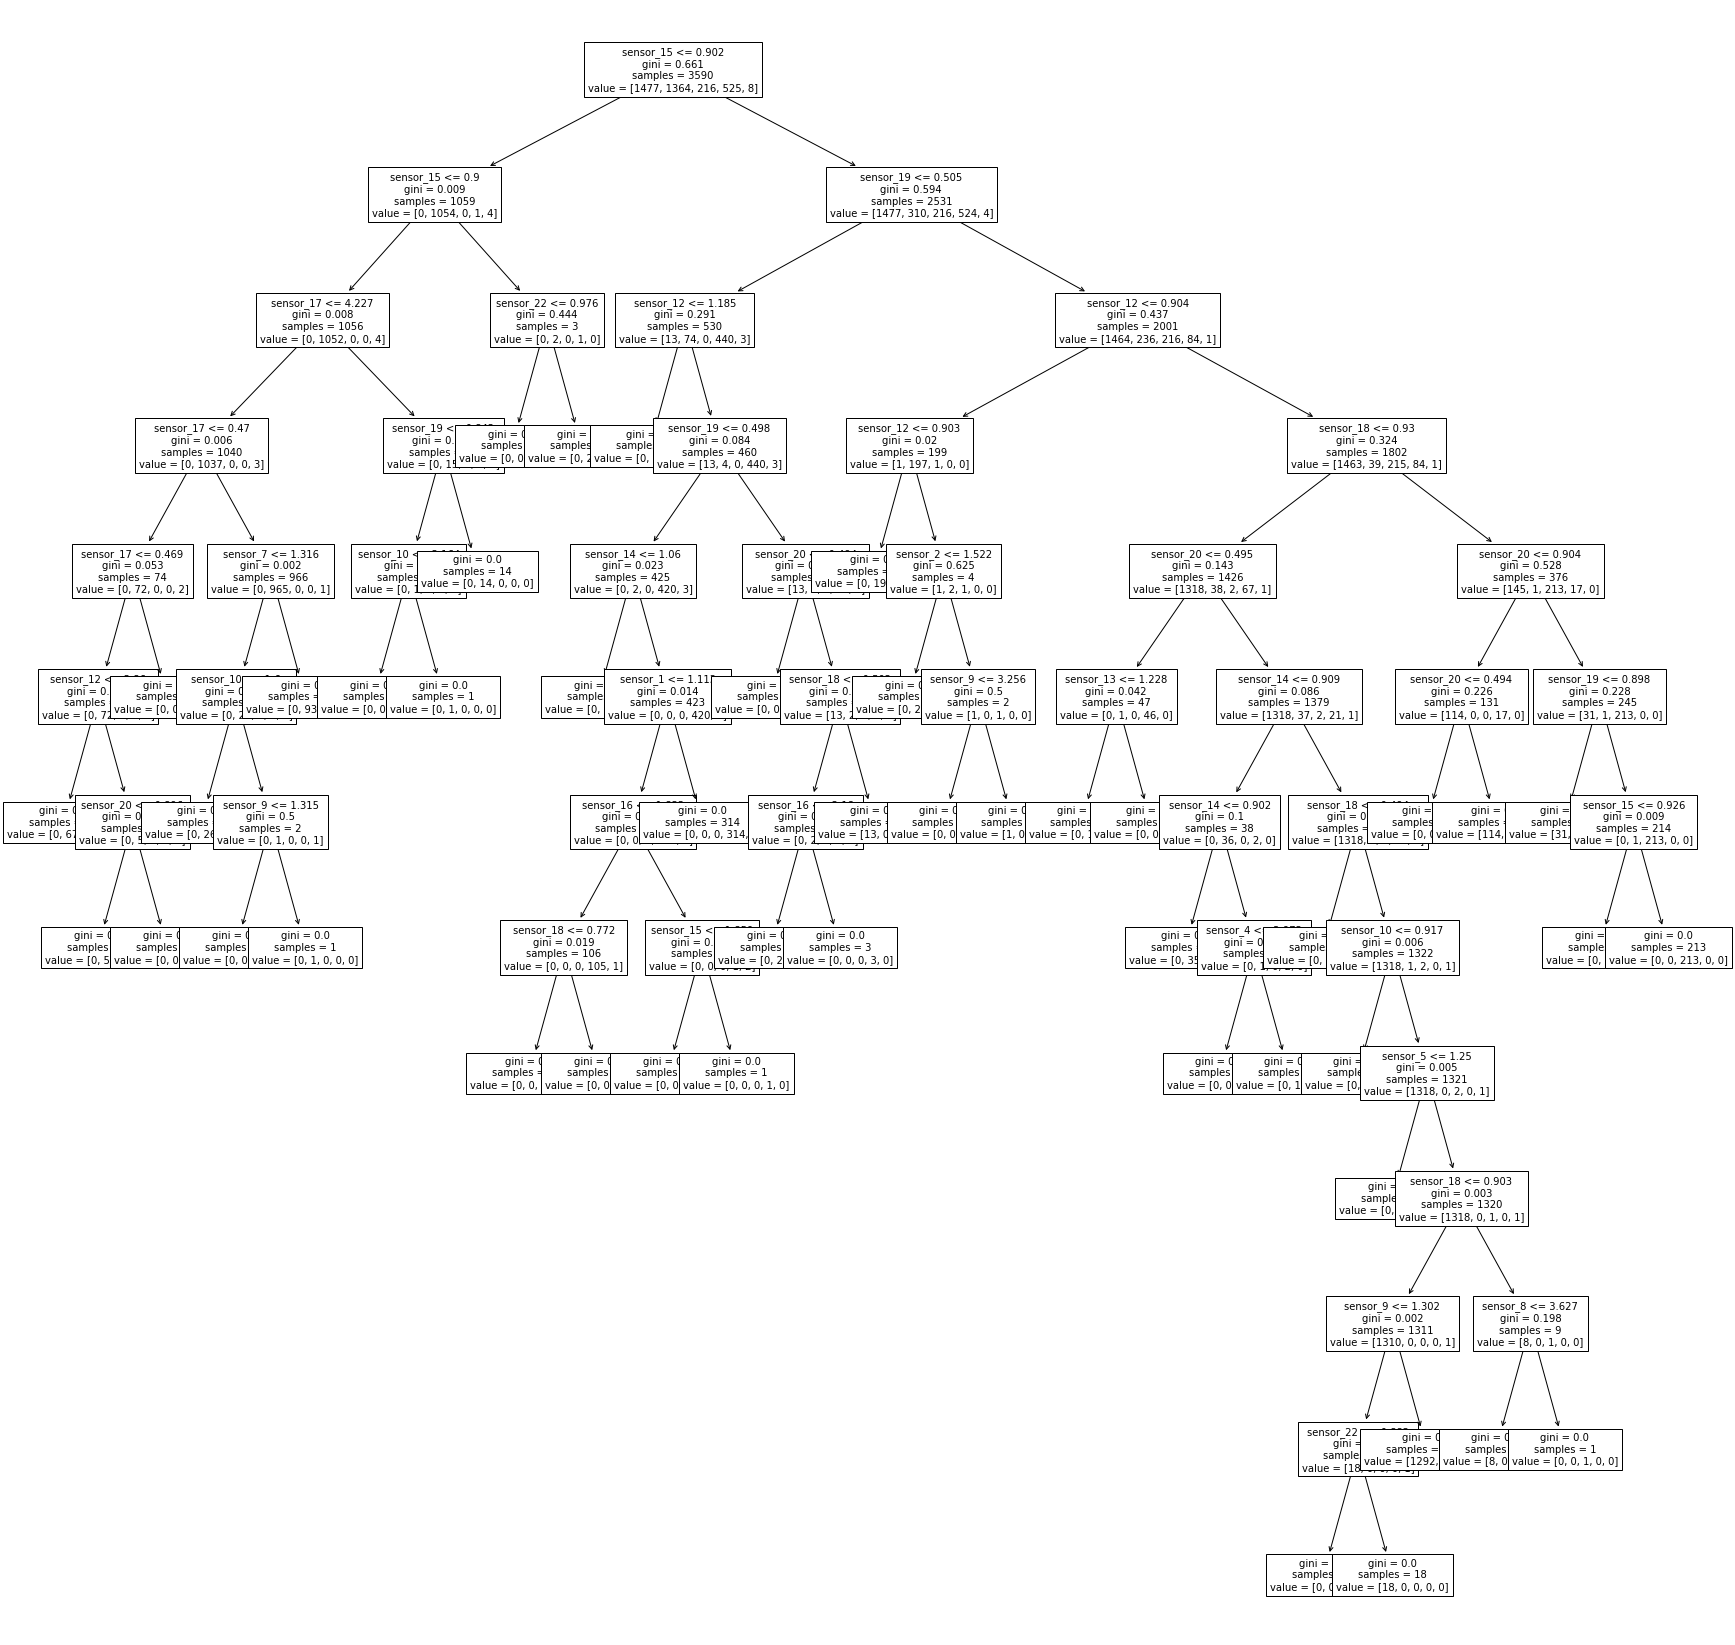

In [231]:
#Visualizando arvore criada
plt.figure(figsize=(30,30))
plot_tree(tree, fontsize=10, feature_names=X_train.columns)
plt.show()

In [232]:
# Florestas aleatorias
floresta = RandomForestClassifier(n_estimators=5)
floresta.fit(X_train, y_train)
y_pred = floresta.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(F'Acurácia: {acc:.4f}')
#percebe-se também que a taxa de acerto é ótima

Acurácia: 0.9851


In [234]:
# Avaliando várias florestas
modelos = [( DecisionTreeClassifier(), "1 árvore" ),
           ( RandomForestClassifier(n_estimators=5), "5 árvores" ),
           ( RandomForestClassifier(n_estimators=10), "10 árvores" ),
           ( RandomForestClassifier(n_estimators=100), "100 árvores" )]

for classificador, nome in modelos:
  classificador.fit(X_train, y_train)
  labels = classificador.predict(X_test)

  acc = accuracy_score(y_test, labels)

  print(f"Modelo: {nome} | ACC: {acc:.4f}")

Modelo: 1 árvore | ACC: 0.9831
Modelo: 5 árvores | ACC: 0.9851
Modelo: 10 árvores | ACC: 0.9838
Modelo: 100 árvores | ACC: 0.9870
